## To-Do:
**EDA**
* ~~corr matrix + reg plots (relationships) [DONE]~~
* ~~hist / box plot (non-normality and outliers) [DONE]~~
* ~~ANOVA test + VIF test [DONE]~~
* work out how to analyse continuous data bounded between 0-1 (i.e. the fractional data)

**Feature Eng**
* transform continuous [IN PROGRESS]
* ~~scale continuous [DONE]~~
* categorical: bin zip_codes + dummy cluster types (too many zip codes to dummy)
* ~~binary data can be left as is~~
* interactions (between cont and binary/discrete?)

# Importing general packages, dataset, and providing a data description

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Clothing_Store.csv')

In [3]:
pd.set_option('max_columns', 51)
data.describe().round(3)

,HHKEY,ZIP_CODE,REC,FRE,MON,CC_CARD,AVRG,PC_CALC20,PSWEATERS,PKNIT_TOPS,PKNIT_DRES,PBLOUSES,PJACKETS,PCAR_PNTS,PCAS_PNTS,PSHIRTS,PDRESSES,PSUITS,POUTERWEAR,PJEWELRY,PFASHION,PLEGWEAR,PCOLLSPND,AMSPEND,PSSPEND,CCSPEND,AXSPEND,TMONSPEND,OMONSPEND,SMONSPEND,PREVPD,GMP,PROMOS,DAYS,FREDAYS,MARKDOWN,CLASSES,COUPONS,STYLES,STORES,STORELOY,WEB,MAILED,RESPONDED,RESPONSERATE,HI,LTFREDAY,CLUSTYPE,PERCRET,RESP
count,2.174000e+04,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000,21740.000
mean,9.955672e+12,48935.216,126.966,5.064,472.888,0.384,113.889,12.572,0.214,0.027,0.041,0.093,0.136,0.086,0.069,0.066,0.068,0.034,0.018,0.010,0.030,0.013,0.073,14.218,147.822,286.852,24.257,90.008,31.991,222.472,41.669,0.522,11.577,437.630,170.853,0.187,7.146,0.750,17.205,2.340,2116.290,0.042,4.673,1.194,17.277,37.889,80.240,15.107,0.131,0.166
std,5.195910e+08,24086.449,104.738,6.420,640.051,0.486,87.250,2.461,0.230,0.069,0.110,0.136,0.183,0.140,0.132,0.117,0.157,0.131,0.100,0.037,0.078,0.050,0.174,149.864,395.139,441.461,113.856,184.616,97.164,362.774,108.107,0.142,7.142,192.902,146.172,0.129,5.346,1.673,24.616,1.603,1806.105,0.200,3.547,1.829,24.543,28.150,78.730,12.214,0.557,0.372
min,9.955600e+12,0.000,1.000,1.000,0.990,0.000,0.490,11.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.010,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,1.000,1.000,3.000,0.000,0.000,0.000,0.000,0.050,0.090,0.000,0.000,0.000
25%,9.955616e+12,30339.000,35.000,1.000,135.605,0.000,60.990,11.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,78.000,0.000,0.000,0.000,0.000,0.000,0.460,5.000,287.000,67.000,0.090,3.000,0.000,5.000,1.000,337.000,0.000,1.000,0.000,0.000,18.410,24.958,5.000,0.000,0.000
50%,9.955628e+12,48335.000,98.000,3.000,263.490,0.000,92.070,11.000,0.160,0.000,0.000,0.050,0.040,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,147.600,0.000,0.000,0.000,108.000,0.000,0.550,12.000,447.000,124.000,0.180,6.000,0.000,9.000,2.000,1670.000,0.000,4.000,0.000,0.000,29.520,52.000,11.000,0.000,0.000
75%,9.955639e+12,66707.000,206.000,6.000,569.000,1.000,139.505,16.000,0.310,0.030,0.030,0.140,0.230,0.130,0.090,0.100,0.060,0.000,0.000,0.000,0.030,0.004,0.030,0.000,127.938,321.942,0.000,109.992,0.000,287.572,0.000,0.620,17.000,630.000,230.000,0.280,10.000,1.000,20.000,3.000,4176.000,0.000,8.000,2.000,30.000,50.000,107.000,22.000,0.090,0.000
max,9.964401e+12,99687.000,365.000,115.000,22511.490,1.000,1919.880,19.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,10642.720,11476.800,22511.490,4099.920,5562.460,2189.000,13224.070,2259.500,0.990,38.000,713.000,713.000,0.950,37.000,32.000,743.000,19.000,7504.000,1.000,11.000,11.000,100.000,200.000,364.000,50.000,40.920,1.000


In [4]:
# Encoding Valid Phone Number variable numerically
data.loc[data['VALPHON'] == 'Y', 'VALPHON'] = 1
data.loc[data['VALPHON'] == 'N', 'VALPHON'] = 0

### Grouping features by datatype for EDA below (subject to change)

In [5]:
y = ['RESP']

drop = ['HHKEY', 'PC_CALC20', 'STORELOY']
# customer id, unknown, store loyalty (?)


## CATEGORICAL ##
categorical = ['ZIP_CODE', 'CLUSTYPE']
# zip code, market cluster


## DISCRETES ##
discrete = ['REC', 'FRE', 'PROMOS', 'DAYS', 'CLASSES', 'COUPONS', 'STYLES', 'STORES', 'MAILED', 'RESPONDED']
# visits, purchase visits, promos on file, days on file,
# diff product classes purchased, coupons used by cust, diff styles purchased,
# stores cust has shopped in, promos mailed in last yr promos responded in last yr

binary = ['CC_CARD', 'VALPHON', 'WEB']
# CC owned, valid phone number on file, shopped on web


## CONTINUOUS ##
cont = ['MON', 'AVRG', 'TMONSPEND', 'OMONSPEND', 'SMONSPEND', 'PREVPD', 'FREDAYS', 'LTFREDAY']
# total spent, average spent per visit, three month, one month, six month, amt spent in same period last yr,
# days between purchases in last yr, days between purchases over lifetime

stores = ['AMSPEND', 'PSSPEND', 'CCSPEND', 'AXSPEND']
# amount spent at each franchise (x4)

continuous = cont + stores


## CONTINUOUS BOUNDED BETWEEN 0-1 ##
fractions = ['GMP', 'MARKDOWN', 'RESPONSERATE', 'HI', 'PERCRET']
# gross margin percentage, markdown percentage of customer purchases, 0-100% promotion response rate,
# product uniformity (low is spending diversity), percent of returns

items = ['PSWEATERS', 'PKNIT_TOPS', 'PKNIT_DRES', 'PBLOUSES',
       'PJACKETS', 'PCAR_PNTS', 'PCAS_PNTS', 'PSHIRTS', 'PDRESSES', 'PSUITS',
       'POUTERWEAR', 'PJEWELRY', 'PFASHION', 'PLEGWEAR', 'PCOLLSPND']

# Preliminary EDA

In [6]:
# Percentage of Responces
data['RESP'].value_counts(normalize=True).round(3)

0    0.834
1    0.166
Name: RESP, dtype: float64

In [7]:
# Testing for skewness in all features (aware that you can't test skewness in binary)
import scipy

columns = list(data.columns)

skewed = []
non_skewed = []

for i in columns:
    p = scipy.stats.skewtest(data[i], nan_policy='omit')[1] # calculates p_value (H0 = sample is from normally distributed pop)
    if p < 0.01:
        skewed.append(i)
    else:
        non_skewed.append(i)

non_skewed

['ZIP_CODE']

*Looks like everything is skewed...*

In [8]:
# Missing data
missing_data = data.isnull().sum(axis=0).reset_index()
missing_data.columns = ['Predictor', 'Count of NaN values']
missing_data['Missing Ratio'] = missing_data['Count of NaN values'] / data.shape[0]
missing_data.loc[missing_data['Missing Ratio'] > 0]

,Predictor,Count of NaN values,Missing Ratio


*NO MISSING DATA - YAY!*

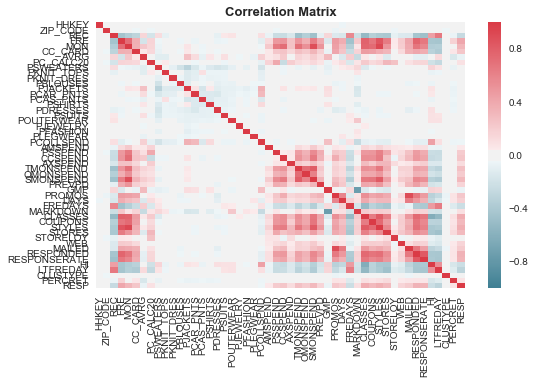

In [9]:
# Correlation matrix
fig, ax = plt.subplots()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data.corr(), ax=ax, cmap=cmap)
ax.set_title('Correlation Matrix', fontweight='bold', fontsize=13)

plt.tight_layout()
plt.show()

In [10]:
# Lists correlation pairs with absolute value of 0.75 or greater
columns = list(data.columns)
corr = pd.DataFrame(data.corr()) # Below requires correlation values in a table

high_corr = np.where(np.abs(corr) >= 0.75) # Chose 0.75 arbitrarily
high_corr = [(corr.columns[x], corr.columns[y]) for x, y in zip(*high_corr) if x != y and x < y]

high_corr

[('FRE', 'CLASSES'),
 ('FRE', 'STYLES'),
 ('FRE', 'RESPONDED'),
 ('MON', 'SMONSPEND'),
 ('MON', 'CLASSES'),
 ('MON', 'STYLES'),
 ('TMONSPEND', 'SMONSPEND'),
 ('SMONSPEND', 'STYLES'),
 ('GMP', 'MARKDOWN'),
 ('PROMOS', 'MAILED'),
 ('CLASSES', 'STYLES'),
 ('RESPONDED', 'RESPONSERATE')]

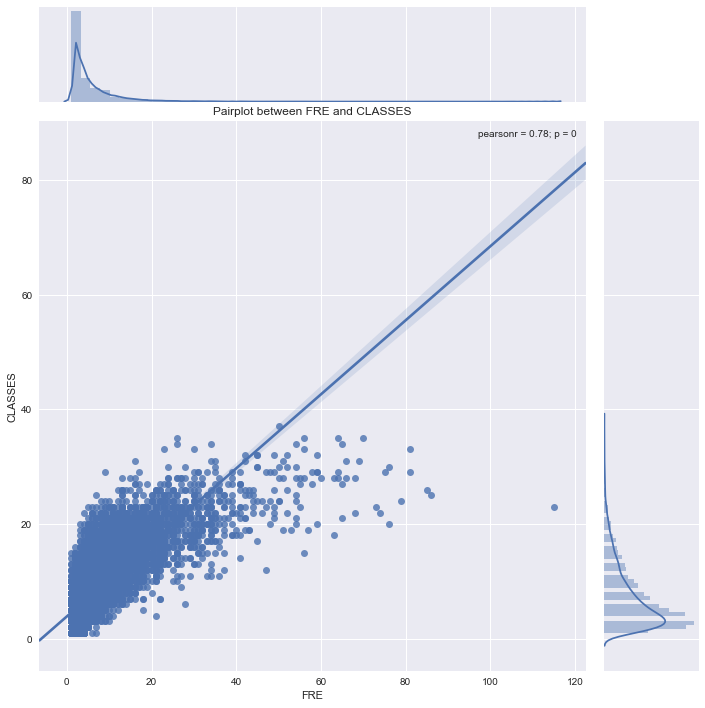

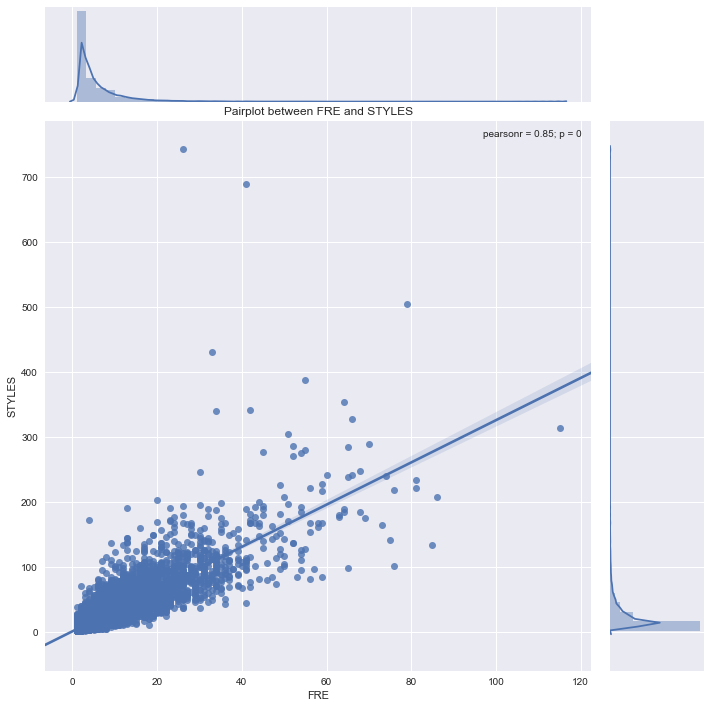

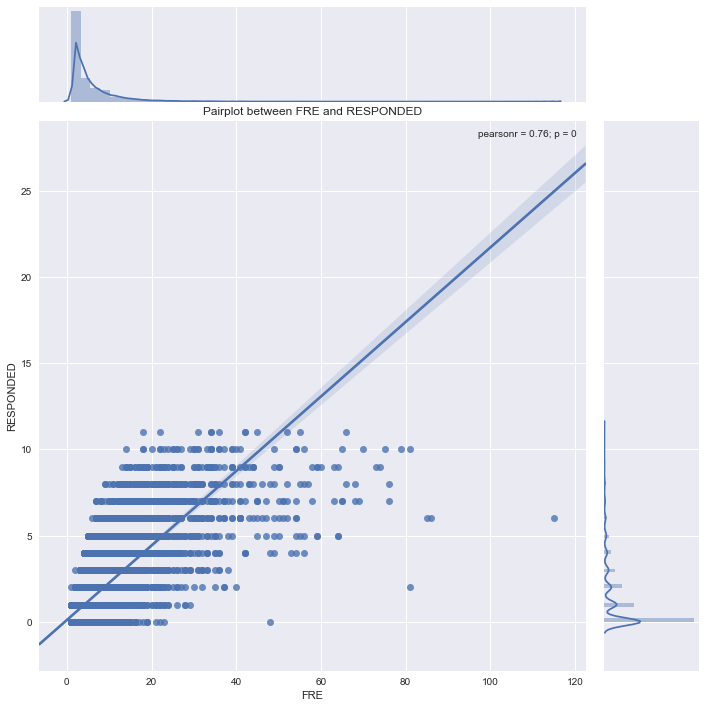

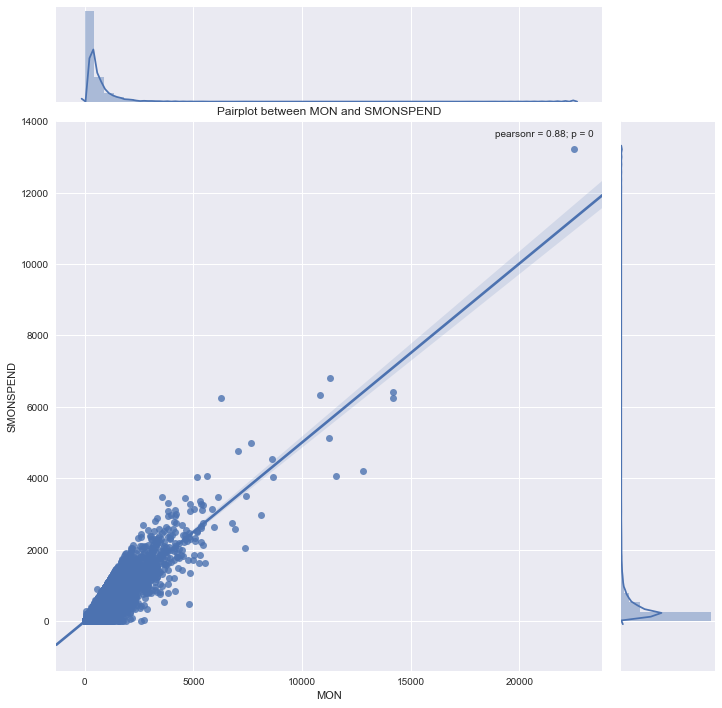

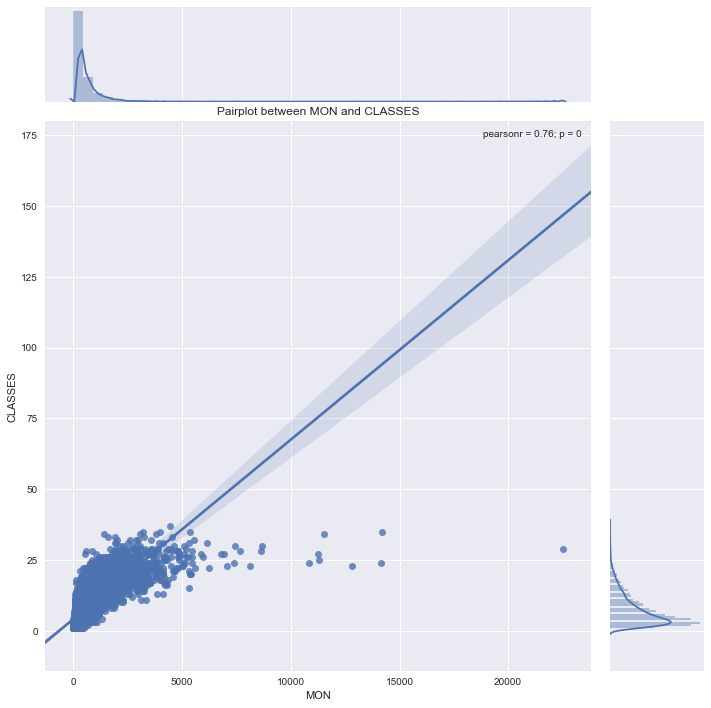

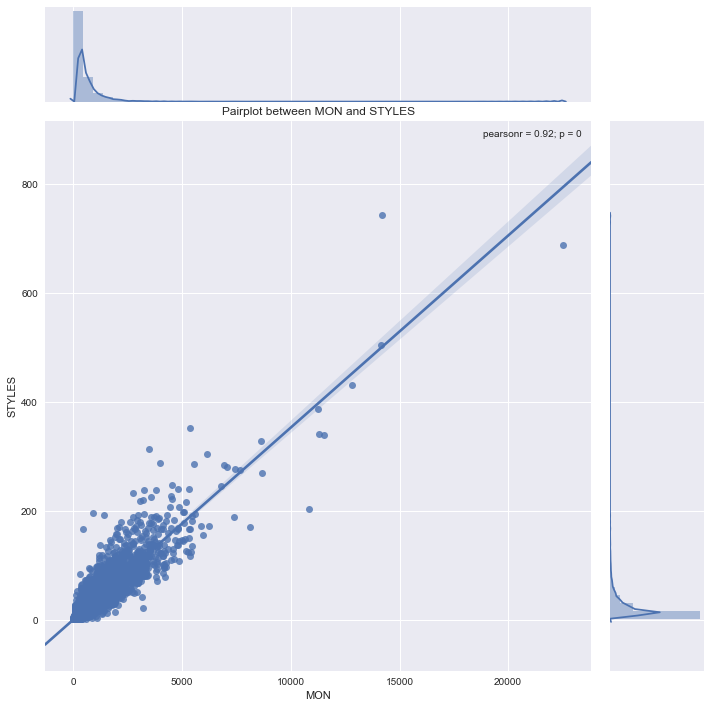

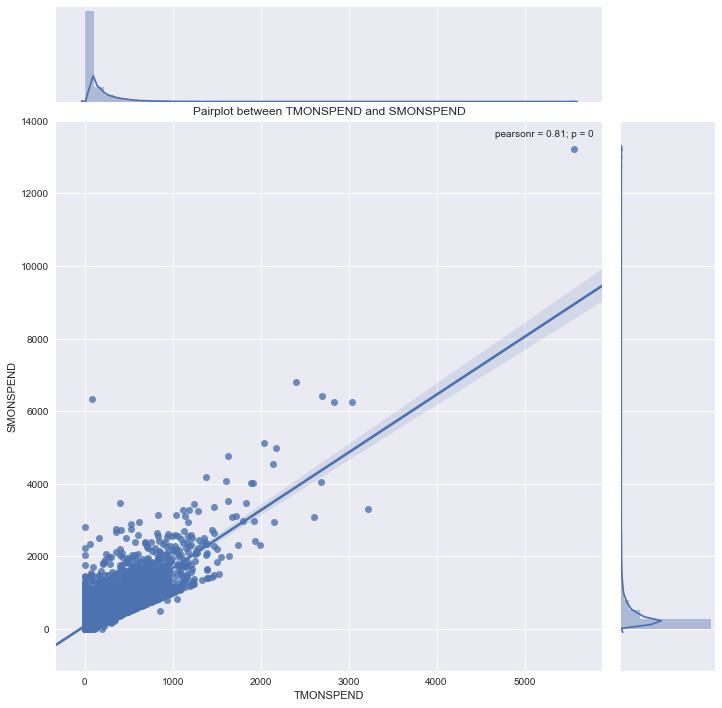

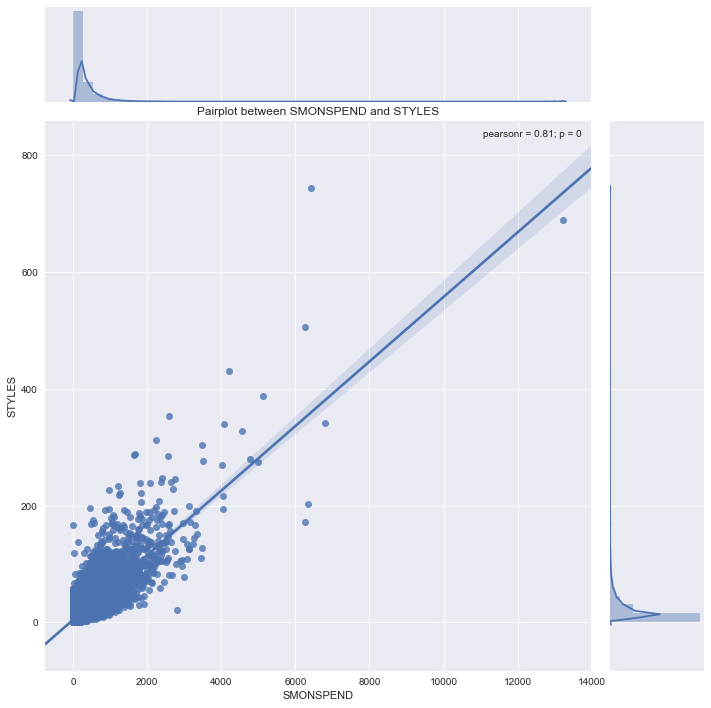

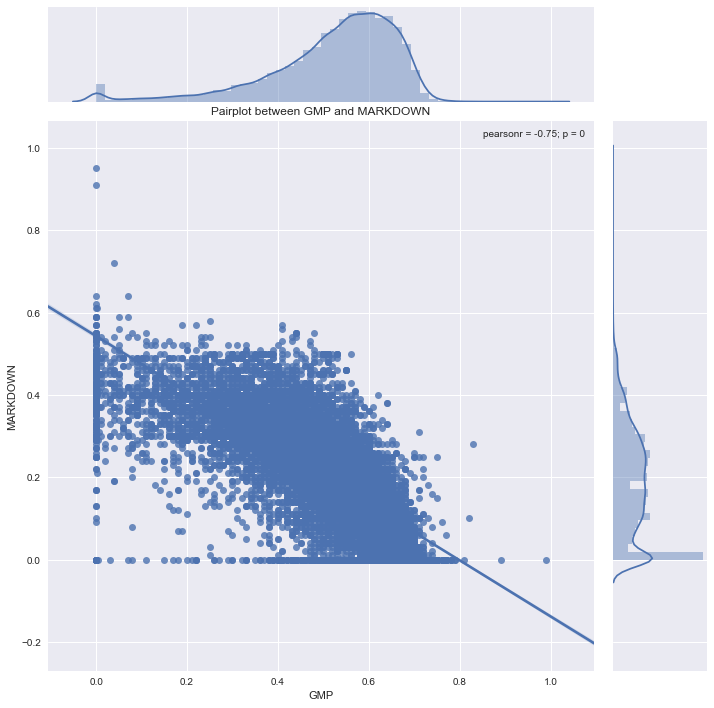

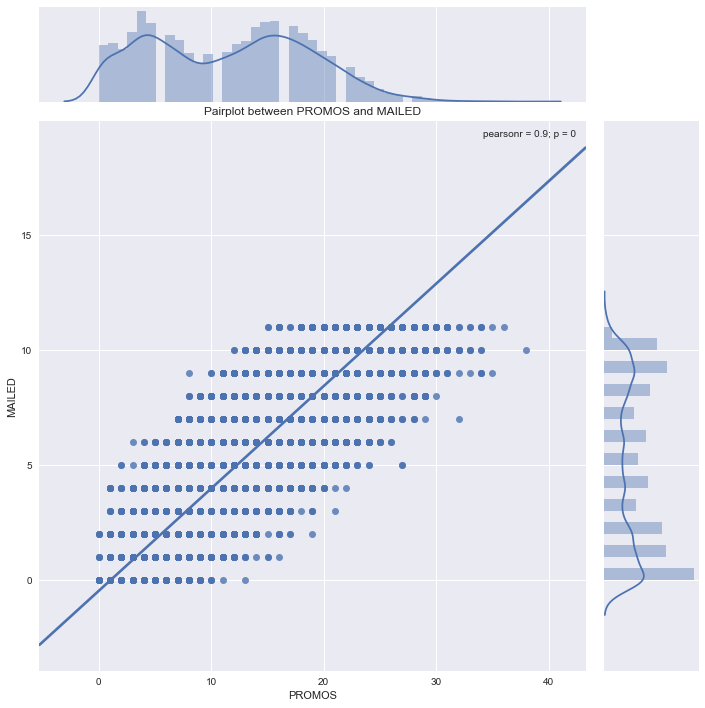

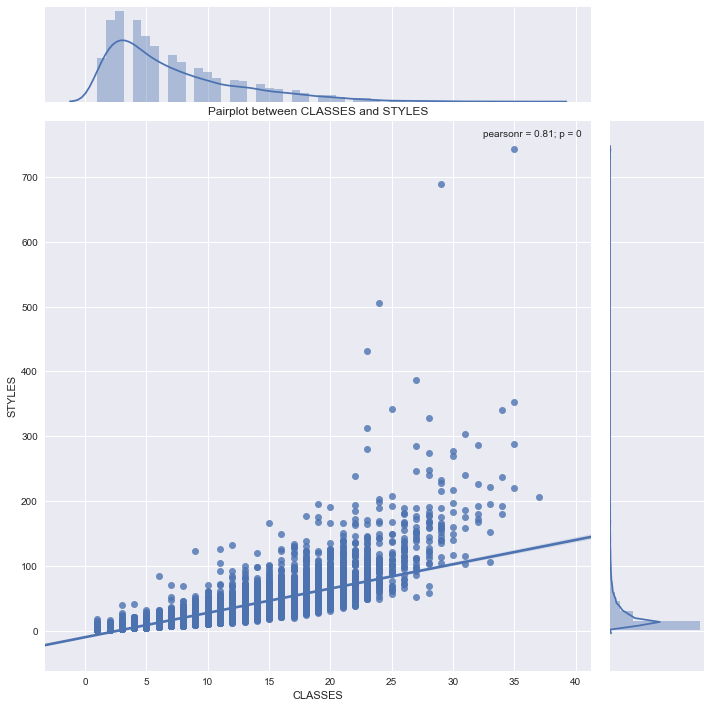

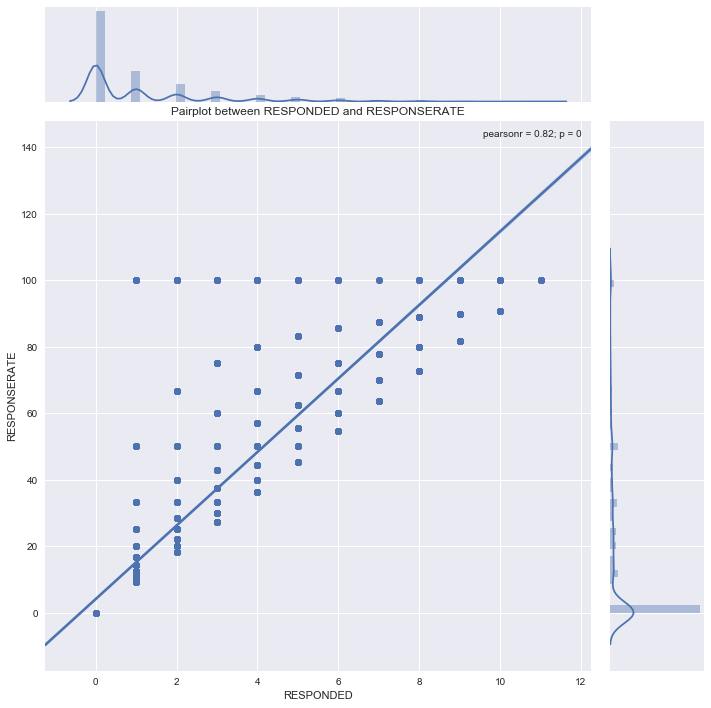

In [11]:
# Pairplots for high correlation pairs (based on above)
for i in high_corr:
    fig = sns.jointplot(x=data[i[0]], y=data[i[1]], kind='reg', size=10)
    sns.plt.title('Pairplot between ' + str(i[0]) + ' and ' + str(i[1]))
    plt.show()

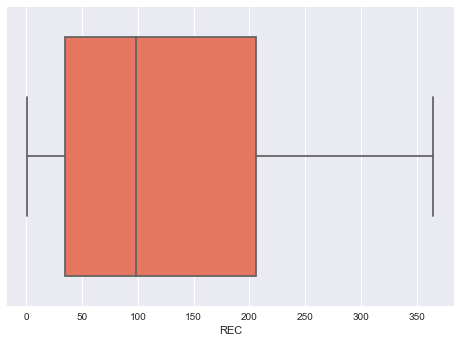

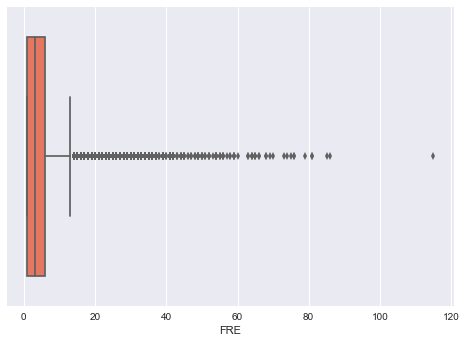

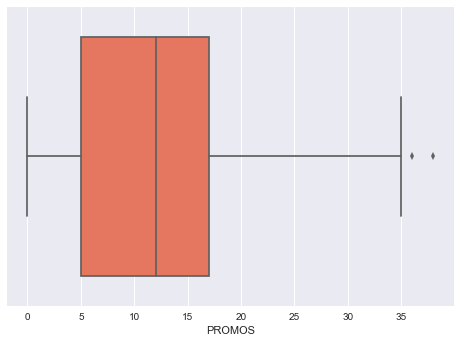

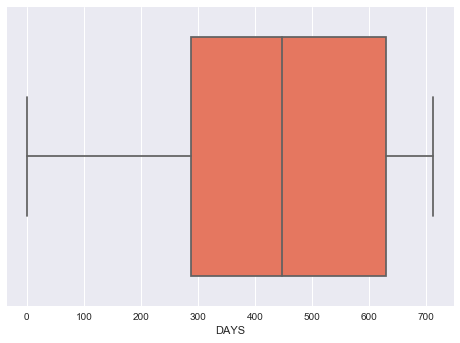

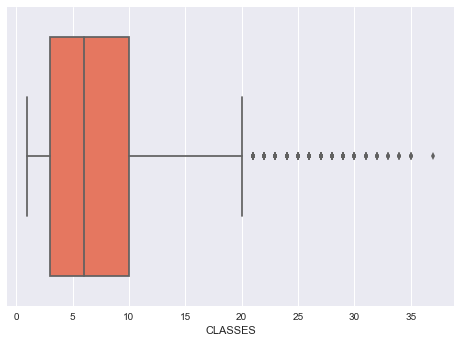

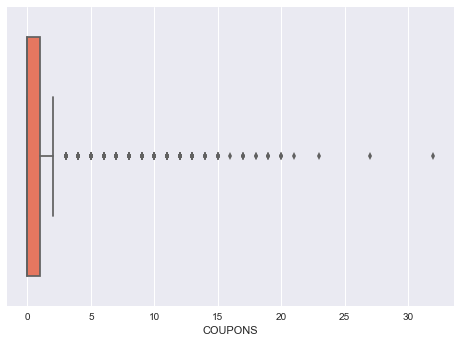

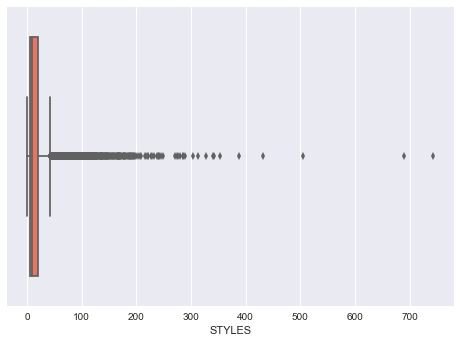

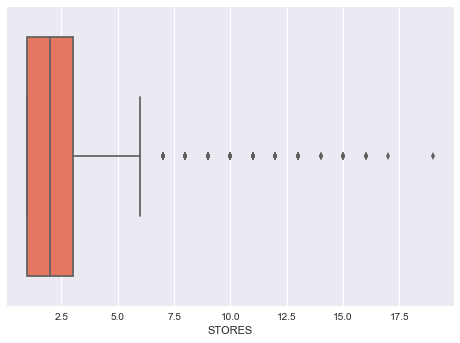

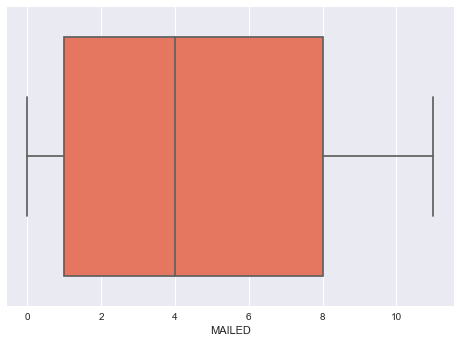

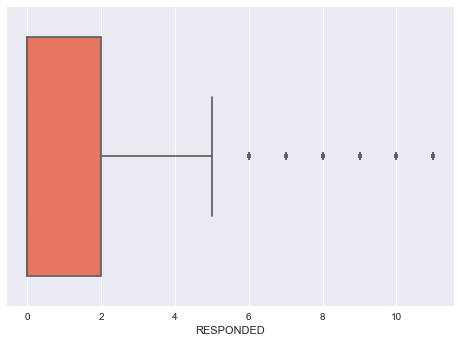

In [12]:
# Boxplot for discrete variables
for i in discrete: 
    fig, ax = plt.subplots()
    sns.boxplot(x=i, data=data, orient='h', palette='Reds')
    plt.show()

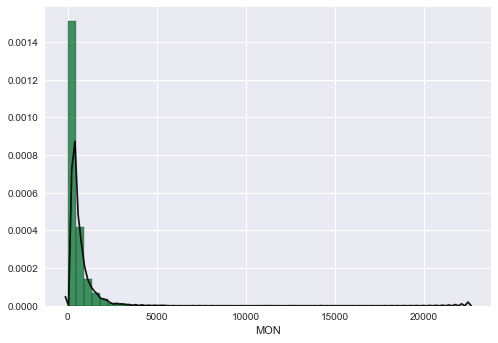

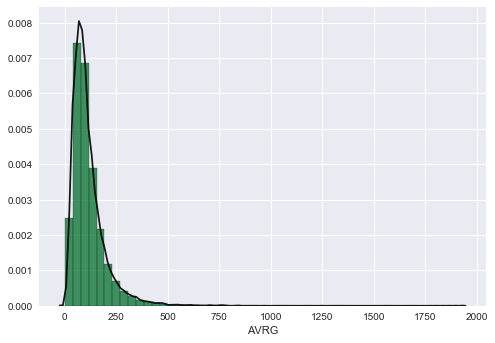

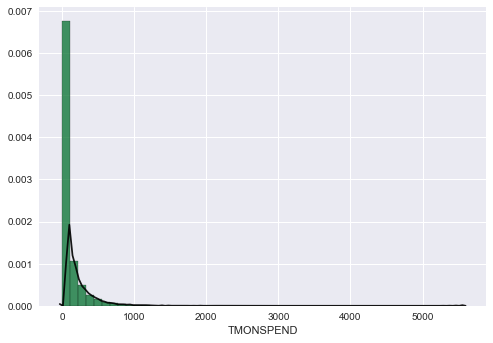

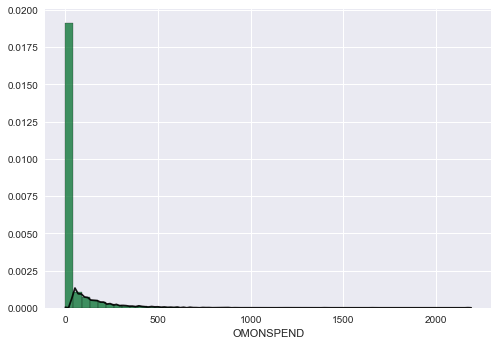

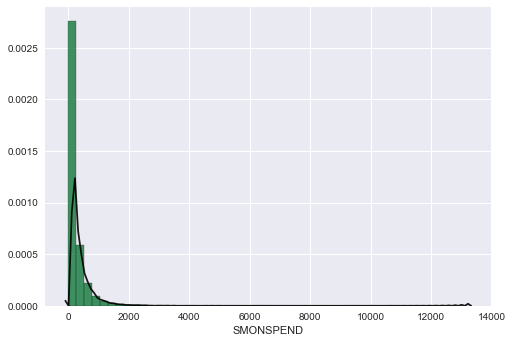

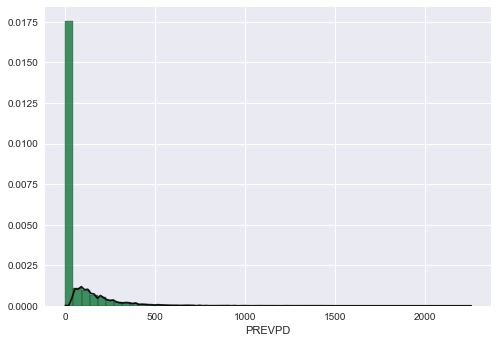

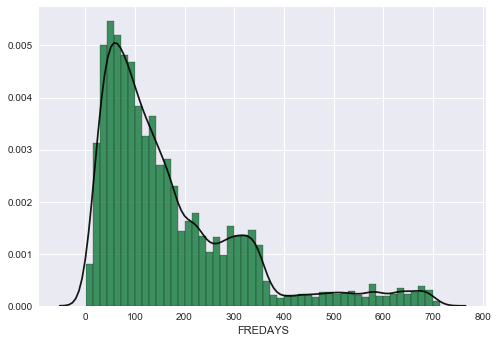

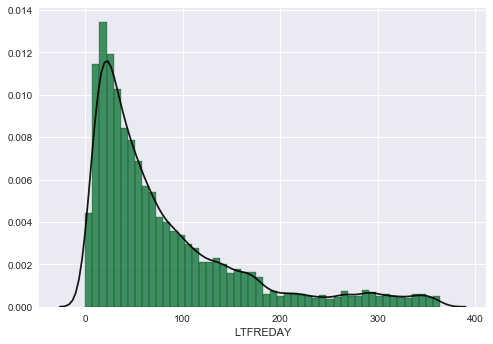

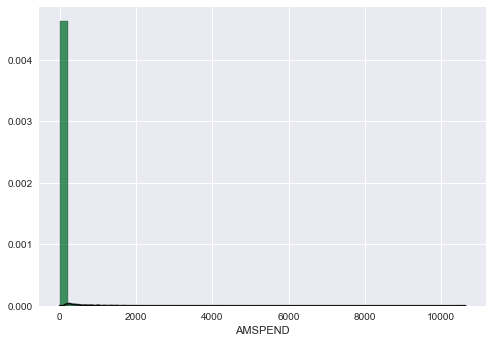

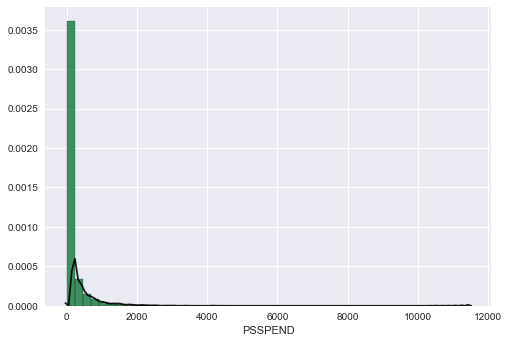

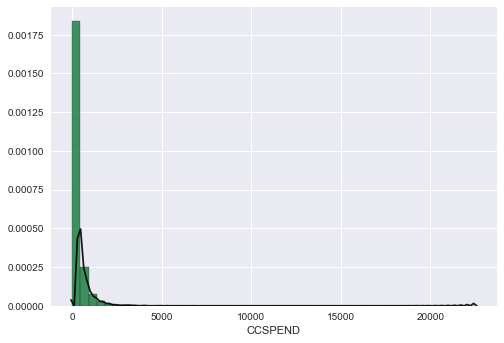

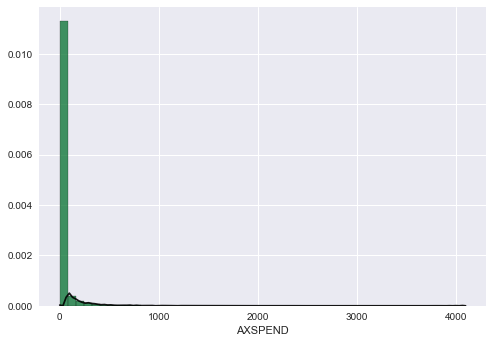

In [13]:
# Histogram for continuous variables
def hist(series):
    fig, ax = plt.subplots()
    sns.distplot(series, ax=ax,
                 hist_kws={'alpha': 0.75,
                           'edgecolor':'black',
                           'color': sns.color_palette('Greens')[-1]},  
                 kde_kws={'color': 'black', 'alpha': 0.9})
    return plt.show()

for i in continuous:
    hist(data[i])

*Several variables seem to have outliers - will need to be addressed for the report*

In [14]:
pivot = pd.pivot_table(data, values=['FRE','DAYS','RESPONDED'], columns='CLUSTYPE')
pivot.round(3)

CLUSTYPE,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
DAYS,419.143,450.339,451.590,445.973,448.295,441.656,438.805,437.306,441.675,458.207,446.103,436.917,425.479,412.925,420.468,435.187,437.782,389.260,435.463,405.778,443.275,406.087,453.094,428.074,437.203,444.786,433.615,432.429,424.467,405.859,418.861,473.150,413.437,485.333,408.382,415.493,432.548,406.478,424.025,447.908,402.005,421.202,402.405,404.419,426.00,398.218,445.695,410.24,421.32,400.250,429.452
FRE,4.857,5.144,5.888,5.242,5.099,5.339,4.700,4.553,4.933,3.862,5.319,5.037,4.576,5.088,4.064,5.420,4.919,4.745,5.306,7.444,4.612,4.609,5.112,5.089,4.735,5.276,4.154,5.857,4.389,3.766,4.322,4.300,5.346,4.333,4.091,5.458,6.161,4.507,4.808,5.956,4.422,4.828,4.091,3.710,1.25,4.750,5.298,2.52,3.92,2.812,5.195
RESPONDED,1.029,1.254,1.478,1.269,1.286,1.246,1.142,1.041,1.159,1.103,1.313,1.229,1.042,1.088,0.737,1.198,1.187,1.000,1.274,1.444,1.092,0.739,1.133,1.261,0.986,1.196,0.846,1.095,0.977,0.781,0.957,1.075,1.078,1.667,1.000,1.206,1.161,0.970,1.041,1.480,0.843,1.141,0.950,0.677,0.00,1.016,1.156,0.52,0.96,0.375,1.175


In [15]:
crosstab = pd.crosstab(data['RESP'],data['RESPONDED'])
crosstab

RESPONDED,0,1,2,3,4,5,6,7,8,9,10,11
RESP,,,,,,,,,,,,
0,10816,3300,1754,925,560,373,204,96,58,29,12,2
1,894,613,518,455,345,262,200,139,92,55,28,10


# Further Tests for EDA

In [16]:
from scipy import stats

# Non-parametric Kruskal-Wallis ANOVA rank test - discrete variables
H = []
p = []

for i in discrete:
    h, pval = stats.kruskal(*[data.loc[data[i]==v,'RESP'] for v in data[i].unique()])
    H.append(h)
    p.append(pval)

# Calculates significance at 1% and appends results
test_results = []
for value in p:
    if value < 0.01:
        test_results.append('True')
    else:
        test_results.append('False')

# Creates tables with the values above
table = pd.DataFrame(H, columns = ['H Stat'], index = discrete)
table['p values'] = pd.DataFrame(p, index = discrete)
table['Reject, \u03b1=0.01'] = pd.DataFrame(test_results, index = discrete)

table.round(2)

,H Stat,p values,"Reject, α=0.01"
REC,2202.13,0.0,True
FRE,4096.08,0.0,True
PROMOS,1313.31,0.0,True
DAYS,1600.12,0.0,True
CLASSES,3077.12,0.0,True
COUPONS,2395.66,0.0,True
STYLES,3820.81,0.0,True
STORES,2042.75,0.0,True
MAILED,1093.56,0.0,True
RESPONDED,2698.85,0.0,True


In [17]:
# Same test as above, for binary and categorical variables
H = []
p = []

for i in binary+categorical:
    h, pval = stats.kruskal(*[data.loc[data[i]==v,'RESP'] for v in data[i].unique()])
    H.append(h)
    p.append(pval)

test_results = []
for value in p:
    if value < 0.01:
        test_results.append('True')
    else:
        test_results.append('False')

table = pd.DataFrame(H, columns = ['H Stat'], index = binary+categorical)
table['p values'] = pd.DataFrame(p, index = binary+categorical)
table['Reject, \u03b1=0.01'] = pd.DataFrame(test_results, index = binary+categorical)

table.round(2)

,H Stat,p values,"Reject, α=0.01"
CC_CARD,1265.24,0.00,True
VALPHON,236.33,0.00,True
WEB,555.28,0.00,True
ZIP_CODE,7294.34,0.85,False
CLUSTYPE,50.61,0.45,False


* *Tests all class for H0: all medians are equal and H1: one or more medians are not equal, between response being 0 or 1*
* *Non-parametric required due to skewness in most variables*

**Results**
* *Looks like there isn't significant evidence to reject H0 that medians are different for zip_code or cluster type in determining response - but this could be due to how many classes there are too*

In [18]:
# Variance Inflation Factor calculations for multicollinearity - excluding binary (bc it doesn't work)
from statsmodels.stats.outliers_influence import variance_inflation_factor

pred = discrete + continuous + fractions + items

X = data[pred].as_matrix()
VIF = pd.DataFrame([np.sqrt(variance_inflation_factor(X,j)) for j in range(len(pred))], index=pred, columns=['SQRT(VIF)'])

VIF.sort_values(by='SQRT(VIF)', ascending=False).round(2)

,SQRT(VIF)
MON,167.34
CCSPEND,110.65
PSSPEND,88.71
AMSPEND,31.66
AXSPEND,24.49
GMP,5.04
STYLES,4.89
PROMOS,4.71
MAILED,4.37
DAYS,4.28


# Preliminary engineering

In [19]:
# Scaling all continuous (could consider robust scaling, but won't bother due to past experience in performance deterioration)
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(data[continuous])
data_scale = scaler.transform(data[continuous])
data_scale = pd.DataFrame(data_scale, columns=continuous)
data_scale.head()

,MON,AVRG,TMONSPEND,OMONSPEND,SMONSPEND,PREVPD,FREDAYS,LTFREDAY,AMSPEND,PSSPEND,CCSPEND,AXSPEND
0,-0.163160,0.806220,-0.487554,-0.329251,-0.613265,-0.385449,1.109315,0.390710,-0.094873,-0.37411,0.184864,-0.213057
1,-0.335744,-0.566079,0.259961,0.247006,0.097937,-0.385449,0.021527,-0.466668,-0.094873,-0.37411,-0.065357,-0.213057
2,-0.618540,-0.864080,-0.487554,-0.329251,-0.613265,-0.024686,0.004423,-0.147850,-0.094873,-0.37411,-0.475368,-0.213057
3,0.583048,-0.093287,0.080882,-0.329251,0.417344,1.152421,-0.569436,-0.676757,-0.094873,-0.37411,1.266751,-0.213057
4,-0.602229,-0.303149,-0.013911,-0.329251,-0.372228,-0.385449,-0.833652,-0.708004,-0.094873,-0.37411,-0.451719,-0.213057


*Can merge this with the original dataset later*

#### Transformations (Exploratory)

In [20]:
data['LOG_MON'] = np.log(data['MON'])
data['POWER_MON'] = scipy.stats.boxcox(data['MON'])[0]

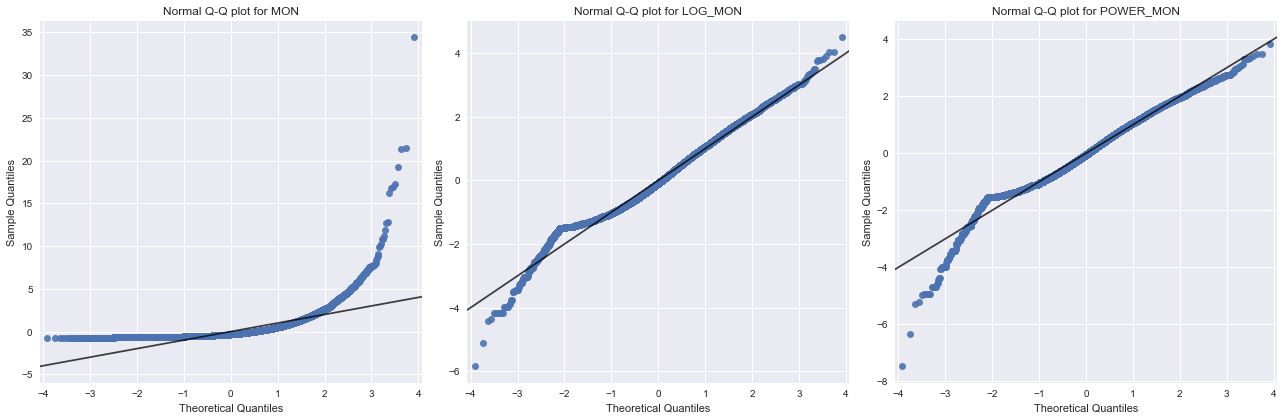

In [23]:
# Comparison of the original and two transformed series on Q-Q plot
import statsmodels.api as sm

label = ['MON', 'LOG_MON', 'POWER_MON']

fig, ax = plt.subplots(1,3, figsize=(18,6))
i=0
for series in label:
    pp = sm.ProbPlot(data[series], fit=True)
    qq = pp.qqplot(color=sns.color_palette()[0], alpha=0.9, ax=ax[i])
    a = ax[i].get_xlim()[0]
    b = ax[i].get_xlim()[1]
    ax[i].plot([a,b],[a,b], color='black', alpha=0.75)
    ax[i].set_xlim(a,b)
    ax[i].set_title('Normal Q-Q plot for {}'.format(series))
    i+=1

plt.tight_layout()
plt.show()

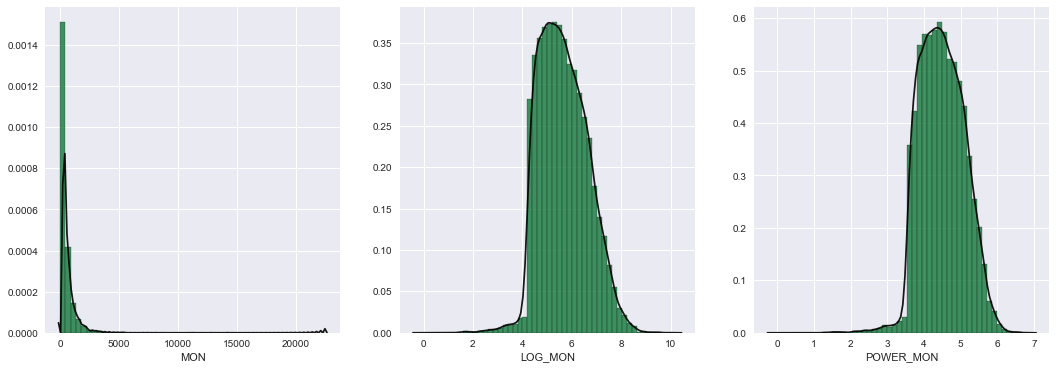

In [24]:
# Comparison of the original and two transformed series
label = ['MON', 'LOG_MON', 'POWER_MON']

fig, ax = plt.subplots(1,3, figsize=(18,6))
i=0
for series in label:
    sns.distplot(data[series], ax=ax[i],
             hist_kws={'alpha': 0.75, 'edgecolor':'black', 'color': sns.color_palette('Greens')[-1]},
                 kde_kws={'color': 'black', 'alpha': 0.9})
    i+=1

plt.show()

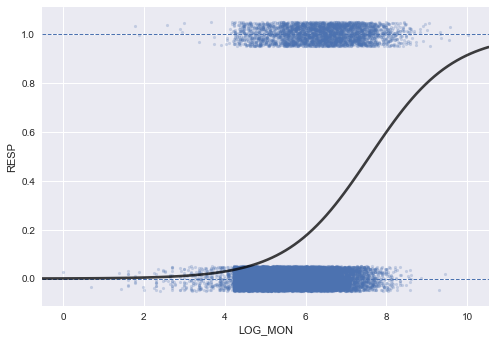

In [25]:
# Plotting the transformed money spent against response with Logit
fig, ax = plt.subplots()

ax.axhline(0.0, linestyle='--', linewidth=1)
ax.axhline(1.0, linestyle='--', linewidth=1)

sns.regplot(data['LOG_MON'], data['RESP'], ax=ax, ci=None, logistic=True, y_jitter=0.05, 
            scatter_kws={'s': 10, 'alpha': 0.25}, line_kws={'alpha': 0.75, 'color': 'black'})

ax.set_xlabel('LOG_MON')
ax.set_ylabel('RESP')

plt.show()

*More to come for transformations...*